In [1]:
#wrangle the data
import pandas as pd
import numpy as np
import time

#see the data
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

#play with words
import nltk.sentiment
import nltk
import re
from pprint import pprint

#split and model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import ToktokTokenizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#import 
from sklearn.feature_extraction.text import CountVectorizer

#sql creds
import env as e
import acquire as a
#scraping
import requests
from bs4 import BeautifulSoup

import os
import json
from typing import Dict, List, Optional, Union, cast
import requests

from env import github_token, github_username

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [5]:
from pprint import pprint
from urllib.parse import urljoin

start_page = 1
end_page = 50
base_url = "https://github.com/search?o=desc&q=stars:%3E1&s=forks&type=Repositories"
links = []

# Iterate over each page
for page in range(start_page, end_page + 1):
    url = f"{base_url}&p={page}"
    headers = {"User-Agent": "Chrome/91.0.4472.124"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    repo_items = soup.find_all('li', class_='repo-list-item')
    
    for link in repo_items:
        relative_url = link.a.attrs['href']
        relative_url = relative_url.lstrip('/')  # Remove leading forward slash
        links.append(relative_url)

    # Add a time delay of 1 second
    time.sleep(2)
    
# Print all the links
for link in links:
    pprint(link)
    print()


'octocat/Spoon-Knife'

'github/gitignore'

'Pierian-Data/Complete-Python-3-Bootcamp'

'twbs/bootstrap'

'rdpeng/ExData_Plotting1'

'EbookFoundation/free-programming-books'

'eugenp/tutorials'

'torvalds/linux'

'tensorflow/models'

'TheOdinProject/css-exercises'

'Yidadaa/ChatGPT-Next-Web'

'DefinitelyTyped/DefinitelyTyped'

'microsoft/vscode'

'mdn/learning-area'

'danielmiessler/SecLists'

'soyHenry/Prep-Course'

'rails/rails'

'LarryMad/recipes'

'apache/echarts'

'keras-team/keras'

'bitcoin/bitcoin'

'qmk/qmk_firmware'

'Yidadaa/ChatGPT-Next-Web'

'DataScienceSpecialization/courses'

'Significant-Gravitas/Auto-GPT'

'django/django'

'mdn/learning-area'

'apache/dubbo'

'hiifeng/V2ray-for-Doprax'

'flutter/flutter'

'yankils/hello-world'

'rafaballerini/rafaballerini'

'linuxacademy/devops-essentials-sample-app'

'codebasics/py'

'pandas-dev/pandas'

'streamlit/streamlit-example'

'netty/netty'

'wesm/pydata-book'

'soyHenry/fe-ct-prepcourse-fs'

'jlevy/the-art-of-command-line'

'm

In [6]:
len(links)

180

In [7]:
links

['octocat/Spoon-Knife',
 'github/gitignore',
 'Pierian-Data/Complete-Python-3-Bootcamp',
 'twbs/bootstrap',
 'rdpeng/ExData_Plotting1',
 'EbookFoundation/free-programming-books',
 'eugenp/tutorials',
 'torvalds/linux',
 'tensorflow/models',
 'TheOdinProject/css-exercises',
 'Yidadaa/ChatGPT-Next-Web',
 'DefinitelyTyped/DefinitelyTyped',
 'microsoft/vscode',
 'mdn/learning-area',
 'danielmiessler/SecLists',
 'soyHenry/Prep-Course',
 'rails/rails',
 'LarryMad/recipes',
 'apache/echarts',
 'keras-team/keras',
 'bitcoin/bitcoin',
 'qmk/qmk_firmware',
 'Yidadaa/ChatGPT-Next-Web',
 'DataScienceSpecialization/courses',
 'Significant-Gravitas/Auto-GPT',
 'django/django',
 'mdn/learning-area',
 'apache/dubbo',
 'hiifeng/V2ray-for-Doprax',
 'flutter/flutter',
 'yankils/hello-world',
 'rafaballerini/rafaballerini',
 'linuxacademy/devops-essentials-sample-app',
 'codebasics/py',
 'pandas-dev/pandas',
 'streamlit/streamlit-example',
 'netty/netty',
 'wesm/pydata-book',
 'soyHenry/fe-ct-prepcourse-f

In [8]:
df = pd.read_json('data2.json')
df.head()

,repo,language,readme_contents
0,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
1,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...
2,Pierian-Data/Complete-Python-3-Bootcamp,Jupyter Notebook,# Complete-Python-3-Bootcamp\nCourse Files for...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,rdpeng/ExData_Plotting1,None,## Introduction\n\nThis assignment uses data f...


In [9]:
def tokenize(text):
    """
    Tokenizes the words in the input string.
    """
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

In [10]:
def clean(text: str) -> list: 
    """A simple function to cleanup text data"""
    
    #remove non-ascii characters & lower
    text = (text.encode('ascii', 'ignore')
                .decode('utf-8', 'ignore')
                .lower())
    
    #remove special characters
    words = re.sub(r'[^\w\s]', ' ', text).split()
    
    #build the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    #getting all stopwords
    stopwords = set(nltk.corpus.stopwords.words('english'))
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [11]:
#clean data
df['clean_contents'] = df.readme_contents.apply(tokenize).apply(' '.join)
df['clean_contents'] = df.clean_contents.apply(clean).apply(' '.join)

In [12]:
# create nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [13]:
#apply to dataframe
df['sentiment'] = df['clean_contents'].apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

,repo,language,readme_contents,clean_contents,sentiment
0,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,0.9371
1,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...,collection gitignore template github collectio...,0.9992
2,Pierian-Data/Complete-Python-3-Bootcamp,Jupyter Notebook,# Complete-Python-3-Bootcamp\nCourse Files for...,complete python 3 bootcamp course file complet...,0.4404
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p align center href http getbootstrap com img ...,0.9943
4,rdpeng/ExData_Plotting1,None,## Introduction\n\nThis assignment uses data f...,introduction assignment us data href http arch...,0.9903


In [14]:
# add two new columns 'message_length' and 'word_count'

df['message_length'] = df['clean_contents'].str.len()
# we apply our clean function, apply len chained on it

# if we did not want to clean this before word count, we would want to do a split on it

df['word_count'] = df.clean_contents.apply(clean).apply(len)

In [15]:
df.head()

,repo,language,readme_contents,clean_contents,sentiment,message_length,word_count
0,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,0.9371,529,73
1,github/gitignore,None,# A collection of `.gitignore` templates\n\nTh...,collection gitignore template github collectio...,0.9992,4696,646
2,Pierian-Data/Complete-Python-3-Bootcamp,Jupyter Notebook,# Complete-Python-3-Bootcamp\nCourse Files for...,complete python 3 bootcamp course file complet...,0.4404,195,29
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p align center href http getbootstrap com img ...,0.9943,10611,1590
4,rdpeng/ExData_Plotting1,None,## Introduction\n\nThis assignment uses data f...,introduction assignment us data href http arch...,0.9903,3027,479


In [16]:
df.language.describe()

count            159
unique            25
top       JavaScript
freq              36
Name: language, dtype: object

In [17]:
df.language.mode()

0    JavaScript
Name: language, dtype: object

In [21]:
36/159

0.22641509433962265

In [22]:
df.language.value_counts().sum()

159

In [23]:
df.language = df.language.fillna('none')

In [24]:
languages_to_keep = ['JavaScript', 'Python', 'Java']
df['language'] = np.where(df['language'].isin(languages_to_keep), df['language'], 'Other')

In [54]:
114/180

0.6333333333333333

In [55]:
df.head()

,repo,language,readme_contents,clean_contents,sentiment,message_length,word_count
0,octocat/Spoon-Knife,Other,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,0.9371,529,73
1,github/gitignore,Other,# A collection of `.gitignore` templates\n\nTh...,collection gitignore template github collectio...,0.9992,4696,646
2,Pierian-Data/Complete-Python-3-Bootcamp,Other,# Complete-Python-3-Bootcamp\nCourse Files for...,complete python 3 bootcamp course file complet...,0.4404,195,29
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p align center href http getbootstrap com img ...,0.9943,10611,1590
4,rdpeng/ExData_Plotting1,Other,## Introduction\n\nThis assignment uses data f...,introduction assignment us data href http arch...,0.9903,3027,479


In [56]:
df.language.describe()

count       180
unique        4
top       Other
freq        114
Name: language, dtype: object

# Exploration

In [57]:
def split_data(df, variable):
    '''
    take in a DataFrame and target variable. return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.20, random_state=123, stratify=df[variable])
    
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123,
                                      stratify = train_validate[variable])
    return train, validate, test

In [58]:
train, validate, test = split_data(df, 'language')
train.head()

,repo,language,readme_contents,clean_contents,sentiment,message_length,word_count
80,OpenZeppelin/openzeppelin-contracts,JavaScript,> **Warning**\n> Version 5.0 is under active d...,warning version 5 0 active development code br...,0.9988,5683,750
150,Automattic/mongoose,JavaScript,# Mongoose\n\nMongoose is a [MongoDB](https://...,mongoose mongoose mongodb http www mongodb org...,0.9983,9939,1444
11,DefinitelyTyped/DefinitelyTyped,Other,# Definitely Typed [![Build Status](https://tr...,definitely typed build status http travis ci o...,0.9953,22221,3531
147,jikexueyuanwiki/tensorflow-zh,Other,# TensorFlow 官方文档中文版\r\n\r\n![](SOURCE/images/...,tensorflow source image tensorflow jpg android...,0.0000,2198,303
72,fivethirtyeight/data,Other,![GitHub repo size](https://img.shields.io/git...,github repo size http img shield io github rep...,0.7964,398,60


In [59]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that

JavaScript_words = clean(' '.join(train[train.language=='JavaScript']['clean_contents']))
Python_words = clean(' '.join(train[train.language=='Python']['clean_contents']))
Java_words = clean(' '.join(train[train.language=='Java']['clean_contents']))
Other_words = clean(' '.join(train[train.language=='Other']['clean_contents']))
all_words = clean(' '.join(train['clean_contents']))

In [60]:
#check it out
JavaScript_words

['warning',
 'version',
 '5',
 '0',
 'active',
 'development',
 'code',
 'branch',
 'recommended',
 'use',
 'img',
 'src',
 'logo',
 'svg',
 'alt',
 'openzeppelin',
 'height',
 '40px',
 'npm',
 'package',
 'http',
 'img',
 'shield',
 'io',
 'npm',
 'v',
 'openzeppelin',
 'contract',
 'svg',
 'http',
 'www',
 'npmjs',
 'org',
 'package',
 'openzeppelin',
 'contract',
 'coverage',
 'status',
 'http',
 'codecov',
 'io',
 'gh',
 'openzeppelin',
 'openzeppelin',
 'contract',
 'graph',
 'badge',
 'svg',
 'http',
 'codecov',
 'io',
 'gh',
 'openzeppelin',
 'openzeppelin',
 'contract',
 'gitpoaps',
 'http',
 'public',
 'api',
 'gitpoap',
 'io',
 'v1',
 'repo',
 'openzeppelin',
 'openzeppelin',
 'contract',
 'badge',
 'http',
 'www',
 'gitpoap',
 'io',
 'gh',
 'openzeppelin',
 'openzeppelin',
 'contract',
 'doc',
 'http',
 'img',
 'shield',
 'io',
 'badge',
 'doc',
 'f0',
 '9f',
 '93',
 '84',
 'yellow',
 'http',
 'doc',
 'openzeppelin',
 'com',
 'contract',
 'forum',
 'http',
 'img',
 'shield',

In [61]:
#check it out
Python_words

['p',
 'align',
 'center',
 'href',
 'http',
 'www',
 'apachecn',
 'org',
 'img',
 'width',
 '200',
 'src',
 'doc',
 'img',
 'logo',
 'jpg',
 'br',
 'href',
 'http',
 'www',
 'apachecn',
 'org',
 'img',
 'src',
 'http',
 'img',
 'shield',
 'io',
 'badge',
 '3e',
 'home',
 'green',
 'svg',
 'href',
 'http',
 'home',
 'apachecn',
 'org',
 'img',
 'src',
 'http',
 'img',
 'shield',
 'io',
 'badge',
 '3e',
 'green',
 'svg',
 'href',
 'mailto',
 'apache',
 '163',
 'com',
 'img',
 'src',
 'http',
 'img',
 'shield',
 'io',
 'badge',
 '3e',
 'email',
 'green',
 'svg',
 'p',
 'h1',
 'align',
 'center',
 'href',
 'http',
 'github',
 'com',
 'apachecn',
 'ailearning',
 'ai',
 'learning',
 'h1',
 'cc',
 'nc',
 'sa',
 '4',
 '0',
 'http',
 'creativecommons',
 'org',
 'license',
 'nc',
 'sa',
 '4',
 '0',
 'deed',
 'zh',
 'stewart',
 'brand',
 'http',
 'ailearning',
 'apachecn',
 'org',
 'v1',
 'http',
 'alv1',
 'apachecn',
 'org',
 'quantlearning',
 'http',
 'qlearn',
 'apachecn',
 'org',
 'apachecn'

In [62]:
#check it out
Java_words

['spring',
 'framework',
 '5',
 'beginner',
 'guru',
 'repository',
 'example',
 'application',
 'built',
 'spring',
 'framework',
 '5',
 'beginner',
 'guru',
 'http',
 'www',
 'udemy',
 'com',
 'testing',
 'spring',
 'boot',
 'beginner',
 'guru',
 'couponcode',
 'github_repo',
 'online',
 'course',
 'application',
 'simple',
 'spring',
 'boot',
 '2',
 'spring',
 'framework',
 '5',
 'web',
 'application',
 'used',
 'help',
 'student',
 'learn',
 'use',
 'spring',
 'framework',
 'step',
 'step',
 'instruction',
 'detailed',
 'explanation',
 'found',
 'within',
 'course',
 'work',
 'course',
 'please',
 'feel',
 'free',
 'fork',
 'repository',
 'github',
 'repo',
 'link',
 'contain',
 'link',
 'source',
 'code',
 'change',
 'encounter',
 'problem',
 'compare',
 'code',
 'lesson',
 'code',
 'see',
 'link',
 'help',
 'compare',
 'http',
 'github',
 'com',
 'springframeworkguru',
 'spring5webapp',
 'wiki',
 'getting',
 'error',
 'cannot',
 'find',
 'different',
 'lesson',
 'source',
 'code'

In [63]:
#check it out
Other_words

['definitely',
 'typed',
 'build',
 'status',
 'http',
 'travis',
 'ci',
 'org',
 'definitelytyped',
 'definitelytyped',
 'svg',
 'branch',
 'master',
 'http',
 'travis',
 'ci',
 'org',
 'definitelytyped',
 'definitelytyped',
 'el',
 'repositorio',
 'de',
 'definiciones',
 'de',
 'typescript',
 'de',
 'alta',
 'calidad',
 'also',
 'read',
 'readme',
 'english',
 'http',
 'github',
 'com',
 'definitelytyped',
 'definitelytyped',
 'blob',
 'master',
 'readme',
 'md',
 'http',
 'github',
 'com',
 'definitelytyped',
 'definitelytyped',
 'blob',
 'master',
 'readme',
 'ko',
 'md',
 'http',
 'github',
 'com',
 'definitelytyped',
 'definitelytyped',
 'blob',
 'master',
 'readme',
 'ru',
 'md',
 'http',
 'github',
 'com',
 'definitelytyped',
 'definitelytyped',
 'blob',
 'master',
 'readme',
 'zh',
 'han',
 'md',
 'portugus',
 'http',
 'github',
 'com',
 'definitelytyped',
 'definitelytyped',
 'blob',
 'master',
 'readme',
 'pt',
 'md',
 'italiano',
 'http',
 'github',
 'com',
 'definitelytype

In [64]:
#check it out
all_words

['warning',
 'version',
 '5',
 '0',
 'active',
 'development',
 'code',
 'branch',
 'recommended',
 'use',
 'img',
 'src',
 'logo',
 'svg',
 'alt',
 'openzeppelin',
 'height',
 '40px',
 'npm',
 'package',
 'http',
 'img',
 'shield',
 'io',
 'npm',
 'v',
 'openzeppelin',
 'contract',
 'svg',
 'http',
 'www',
 'npmjs',
 'org',
 'package',
 'openzeppelin',
 'contract',
 'coverage',
 'status',
 'http',
 'codecov',
 'io',
 'gh',
 'openzeppelin',
 'openzeppelin',
 'contract',
 'graph',
 'badge',
 'svg',
 'http',
 'codecov',
 'io',
 'gh',
 'openzeppelin',
 'openzeppelin',
 'contract',
 'gitpoaps',
 'http',
 'public',
 'api',
 'gitpoap',
 'io',
 'v1',
 'repo',
 'openzeppelin',
 'openzeppelin',
 'contract',
 'badge',
 'http',
 'www',
 'gitpoap',
 'io',
 'gh',
 'openzeppelin',
 'openzeppelin',
 'contract',
 'doc',
 'http',
 'img',
 'shield',
 'io',
 'badge',
 'doc',
 'f0',
 '9f',
 '93',
 '84',
 'yellow',
 'http',
 'doc',
 'openzeppelin',
 'com',
 'contract',
 'forum',
 'http',
 'img',
 'shield',

In [65]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present

JavaScript_words_freq = pd.Series(JavaScript_words).value_counts()
Python_words_freq = pd.Series(Python_words).value_counts()
Java_words_freq = pd.Series(Java_words).value_counts()
Other_words_freq = pd.Series(Other_words).value_counts()
all_words_freq = pd.Series(all_words).value_counts()

In [66]:
#check it out
JavaScript_words_freq

http                  781
com                   493
github                486
124                   258
stats                 200
                     ... 
htmlschoollocation      1
replaced                1
distinct                1
biographical            1
readme_it               1
Length: 2933, dtype: int64

In [67]:
#check it out
Python_words_freq

http           391
com            230
124            190
github         172
panda          107
              ... 
xtratgbot        1
part1            1
plugin           1
l                1
fundraising      1
Length: 1718, dtype: int64

In [68]:
#check it out
Java_words_freq

http          276
com           179
apache        174
dubbo         138
md            137
             ... 
2cpus           1
ram             1
submitting      1
patch           1
registry        1
Length: 1582, dtype: int64

In [69]:
#check it out
Other_words_freq

http             2204
com              1686
github           1081
124               709
www               371
                 ... 
surreal             1
futuristic          1
descriptive         1
abstract            1
license_cn_en       1
Length: 8643, dtype: int64

In [70]:
#check it out
all_words_freq

http             3652
com              2588
github           1863
124              1195
www               497
                 ... 
abadojack           1
pasos               1
explicados          1
thrown              1
license_cn_en       1
Length: 11202, dtype: int64

In [71]:
pd.concat([JavaScript_words_freq, Python_words_freq, Java_words_freq, Other_words_freq, all_words_freq], axis=1).fillna(0).astype(int)

,0,1,2,3,4
http,781,391,276,2204,3652
com,493,230,179,1686,2588
github,486,172,124,1081,1863
124,258,190,38,709,1195
stats,200,0,0,2,202
...,...,...,...,...,...
strange,0,0,0,1,1
surreal,0,0,0,1,1
futuristic,0,0,0,1,1
abstract,0,0,0,1,1


In [72]:
# lets combine all 5 dfs horizontally
# fill any missing values with zero
# convert the resulting df to contain only integer values:

word_counts = pd.concat([JavaScript_words_freq, Python_words_freq, Java_words_freq, Other_words_freq, all_words_freq], axis=1).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['JavaScript','Python','Java', 'Other','All']

word_counts.head()

,JavaScript,Python,Java,Other,All
http,781,391,276,2204,3652
com,493,230,179,1686,2588
github,486,172,124,1081,1863
124,258,190,38,709,1195
stats,200,0,0,2,202


In [73]:
word_counts.sort_values('All', ascending=False)

,JavaScript,Python,Java,Other,All
http,781,391,276,2204,3652
com,493,230,179,1686,2588
github,486,172,124,1081,1863
124,258,190,38,709,1195
www,46,45,35,371,497
...,...,...,...,...,...
severity,0,0,0,1,1
canon,0,0,0,1,1
shy,0,0,0,1,1
drilldown,0,0,0,1,1


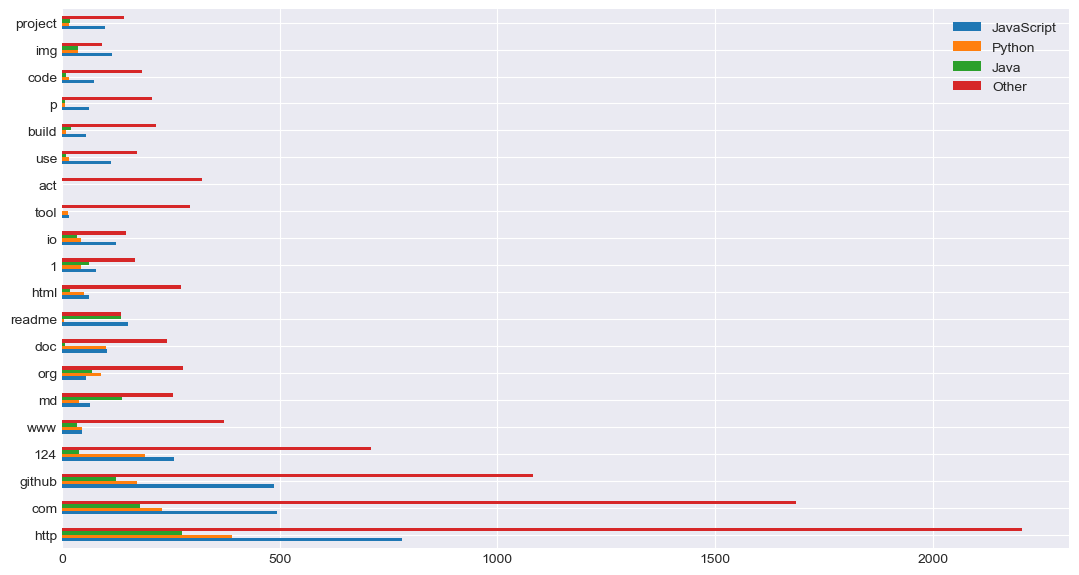

In [74]:
#visualize
word_counts.sort_values('All', ascending=False)[['JavaScript','Python','Java', 'Other']].head(20).plot.barh()
plt.show()

In [75]:
word_counts.sort_values('All', ascending=False).head(20)\
.apply(lambda row: row/row['All'], axis=1)

,JavaScript,Python,Java,Other,All
http,0.213855,0.107065,0.075575,0.603505,1.0
com,0.190495,0.088872,0.069165,0.651468,1.0
github,0.260870,0.092324,0.066559,0.580247,1.0
124,0.215900,0.158996,0.031799,0.593305,1.0
www,0.092555,0.090543,0.070423,0.746479,1.0
md,0.129032,0.078629,0.276210,0.516129,1.0
org,0.111336,0.182186,0.141700,0.564777,1.0
doc,0.227876,0.223451,0.015487,0.533186,1.0
readme,0.352804,0.011682,0.317757,0.317757,1.0
html,0.151365,0.126551,0.044665,0.677419,1.0


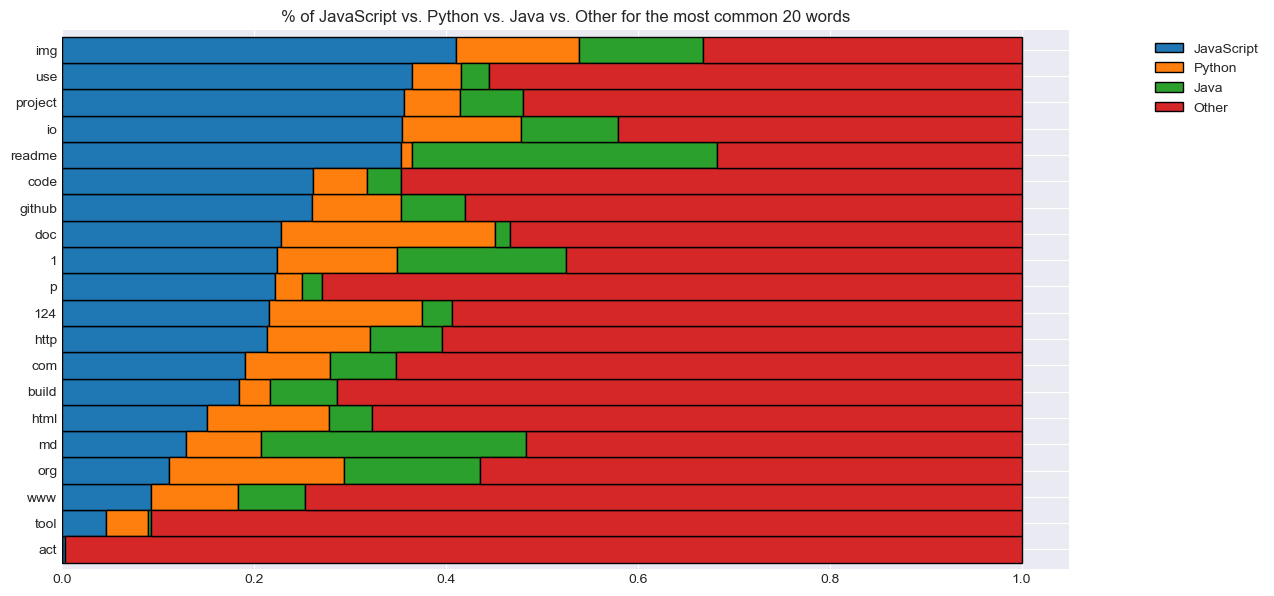

In [76]:
(word_counts.sort_values('All', ascending=False)
.head(20)
.apply(lambda row: row/row['All'], axis = 1)
.drop(columns='All')
.sort_values(by='JavaScript')
.plot.barh(stacked=True, width=1, ec='black')
)

plt.title('% of JavaScript vs. Python vs. Java vs. Other for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

# Word Clouds

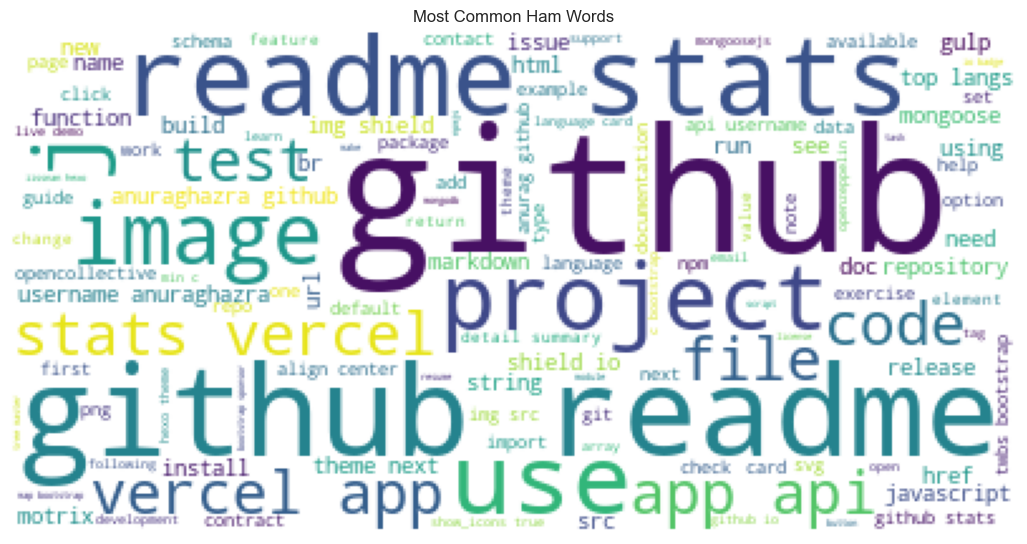

In [77]:
# Javascript word cloud
img = WordCloud(background_color='white').generate(' '.join(JavaScript_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

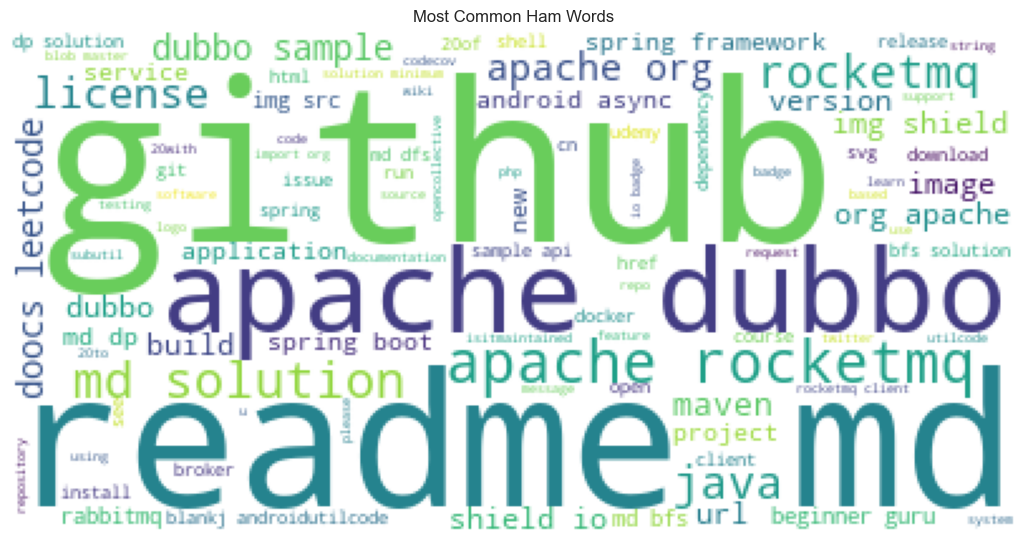

In [78]:
# Java word cloud
img = WordCloud(background_color='white').generate(' '.join(Java_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

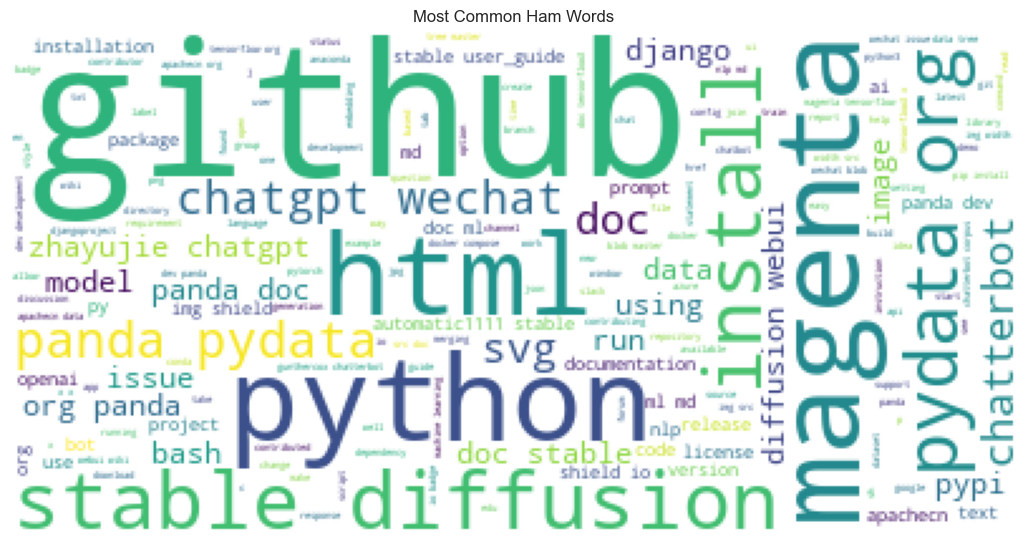

In [79]:
# Python word cloud
img = WordCloud(background_color='white').generate(' '.join(Python_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

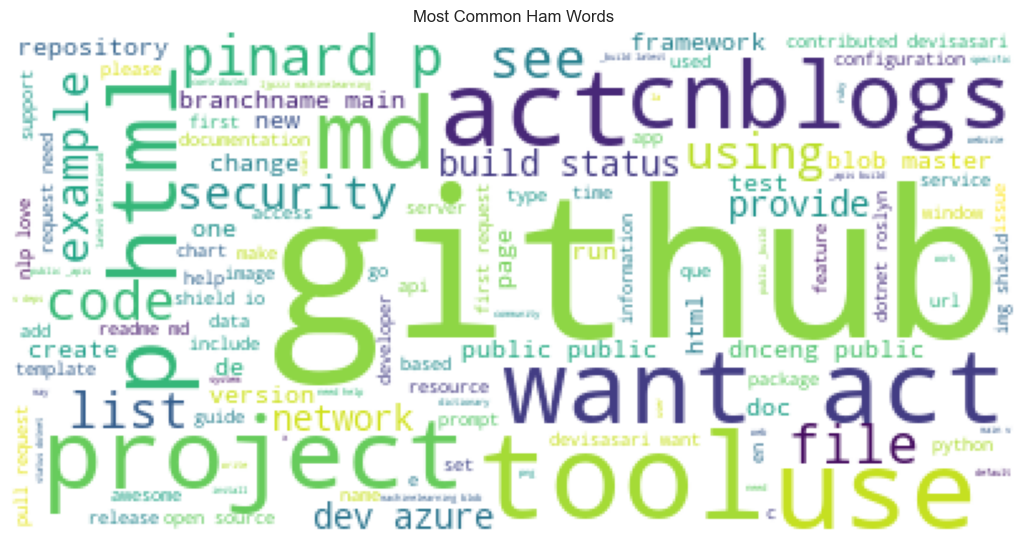

In [80]:
# Other word cloud
img = WordCloud(background_color='white').generate(' '.join(Other_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

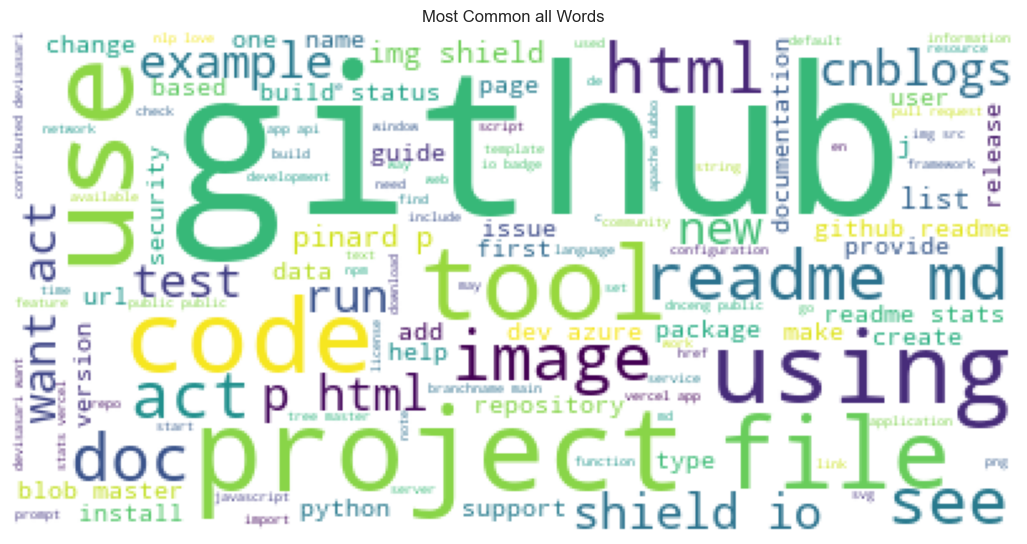

In [81]:
# All word cloud
img = WordCloud(background_color='white').generate(' '.join(all_words))

plt.imshow(img)
plt.axis('off')
plt.title('Most Common all Words')
plt.show()

# Sentiment analysis

In [82]:
# is the mean and median values of sentiment score different for categories?

train.groupby('language').sentiment.agg(['mean','median'])

,mean,median
language,,
Java,0.694600,0.98785
JavaScript,0.921932,0.99470
Other,0.767734,0.97175
Python,0.908490,0.96760


In [83]:
train.head()

,repo,language,readme_contents,clean_contents,sentiment,message_length,word_count
80,OpenZeppelin/openzeppelin-contracts,JavaScript,> **Warning**\n> Version 5.0 is under active d...,warning version 5 0 active development code br...,0.9988,5683,750
150,Automattic/mongoose,JavaScript,# Mongoose\n\nMongoose is a [MongoDB](https://...,mongoose mongoose mongodb http www mongodb org...,0.9983,9939,1444
11,DefinitelyTyped/DefinitelyTyped,Other,# Definitely Typed [![Build Status](https://tr...,definitely typed build status http travis ci o...,0.9953,22221,3531
147,jikexueyuanwiki/tensorflow-zh,Other,# TensorFlow 官方文档中文版\r\n\r\n![](SOURCE/images/...,tensorflow source image tensorflow jpg android...,0.0000,2198,303
72,fivethirtyeight/data,Other,![GitHub repo size](https://img.shields.io/git...,github repo size http img shield io github rep...,0.7964,398,60


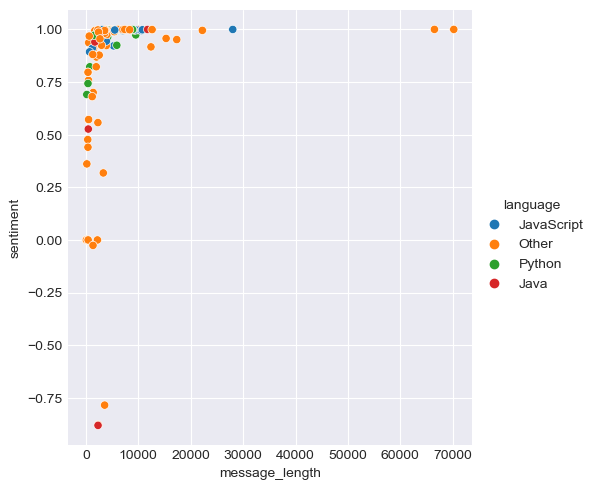

In [84]:
#plot message_length vs sentiment and hue by label

sns.relplot(data=train, x='message_length', y='sentiment', hue='language');

In [85]:
train.language.value_counts()

Other         68
JavaScript    22
Python        10
Java           8
Name: language, dtype: int64

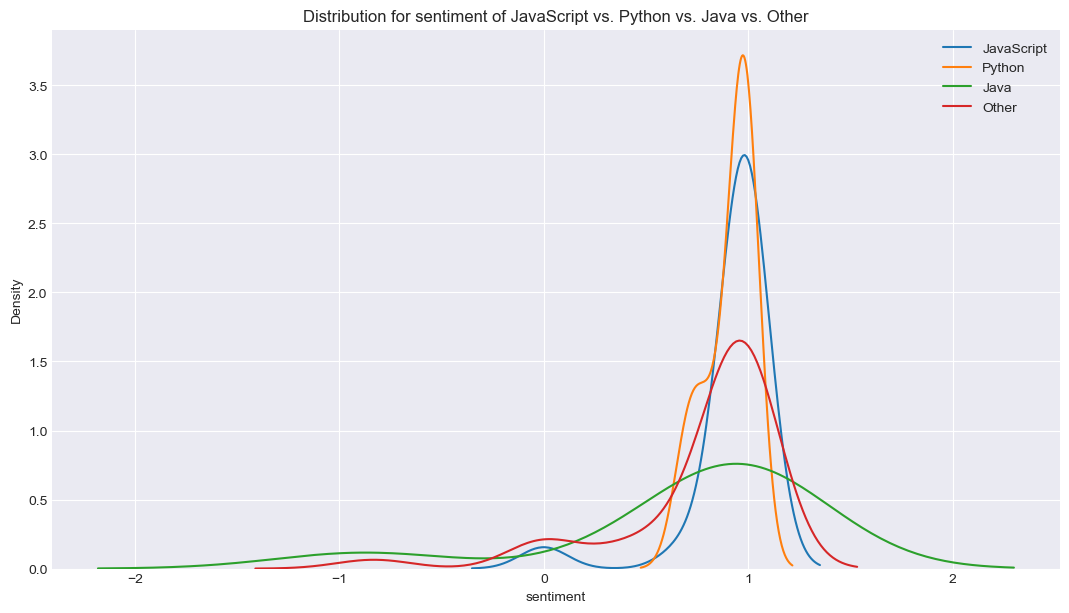

In [86]:
# is the distribution for sentiment 

sns.kdeplot(train[train.language=='JavaScript'].sentiment, label='JavaScript')
sns.kdeplot(train[train.language=='Python'].sentiment, label='Python')
sns.kdeplot(train[train.language=='Java'].sentiment, label='Java')
sns.kdeplot(train[train.language=='Other'].sentiment, label='Other')

plt.legend()
plt.title("Distribution for sentiment of JavaScript vs. Python vs. Java vs. Other")
plt.show()

# Modeling

In [87]:
#make X_train, X_validate, X_test, y_train, y_validate, y_test
X_train = train.clean_contents
X_validate = validate.clean_contents
X_test = test.clean_contents
y_train = train.language
y_validate = validate.language
y_test = test.language

In [88]:
#make my bag of words
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
X_validate_bow = cv.transform(X_validate)
X_test_bow = cv.transform(X_test)

In [89]:
X_bow

<108x11182 sparse matrix of type '<class 'numpy.int64'>'
	with 28603 stored elements in Compressed Sparse Row format>

In [90]:
y_train.head()

80     JavaScript
150    JavaScript
11          Other
147         Other
72          Other
Name: language, dtype: object

## Decision Tree

In [91]:
def decision_tree(X_bow, X_validate_bow, y_train, y_validate):
    """
    This function trains a decision tree classifier on the provided training data, and evaluates its performance on the
    validation data for different values of the 'max_depth' hyperparameter. It then generates a plot of the training and
    validation accuracy scores as a function of 'max_depth', and returns a DataFrame containing these scores.

    Parameters:
    - X_train (pandas.DataFrame): A DataFrame containing the features for the training data.
    - X_validate (pandas.DataFrame): A DataFrame containing the features for the validation data.
    - y_train (pandas.Series): A Series containing the target variable for the training data.
    - y_validate (pandas.Series): A Series containing the target variable for the validation data.

    Returns:
    - scores_df (pandas.DataFrame): A DataFrame containing the training and validation accuracy scores, as well as the
      difference between them, for different values of the 'max_depth' hyperparameter.
    """
    # get data
    scores_all = []
    for x in range(1,20):
        tree = DecisionTreeClassifier(max_depth=x, random_state=123)
    
        tree.fit(X_bow, y_train)
        train_acc = tree.score(X_bow,y_train)
        val_acc = tree.score(X_validate_bow, y_validate)
        score_diff = train_acc - val_acc
        scores_all.append([x, train_acc, val_acc, score_diff])
    
    scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc','val_acc','score_diff'])
    
    # Plot the results
    sns.set_style('whitegrid')
    plt.plot(scores_df['max_depth'], scores_df['train_acc'], label='Train score')
    plt.plot(scores_df['max_depth'], scores_df['val_acc'], label='Validation score')
    plt.fill_between(scores_df['max_depth'], scores_df['train_acc'], scores_df['val_acc'], alpha=0.2, color='gray')
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Accuracy vs Max Depth')
    plt.legend()
    plt.show()

    return scores_df

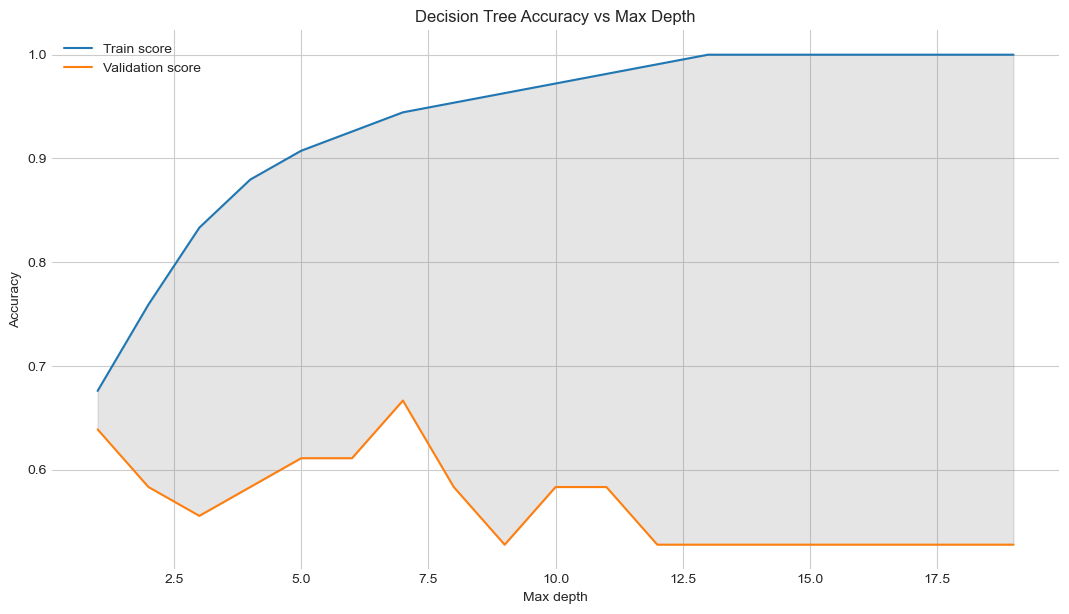

,max_depth,train_acc,val_acc,score_diff
0,1,0.675926,0.638889,0.037037
1,2,0.759259,0.583333,0.175926
2,3,0.833333,0.555556,0.277778
3,4,0.879630,0.583333,0.296296
4,5,0.907407,0.611111,0.296296
5,6,0.925926,0.611111,0.314815
6,7,0.944444,0.666667,0.277778
7,8,0.953704,0.583333,0.370370
8,9,0.962963,0.527778,0.435185
9,10,0.972222,0.583333,0.388889


In [92]:
#run the model
decision_tree(X_bow, X_validate_bow, y_train, y_validate)

## Random Forest

In [93]:
def random_forest_scores(X_bow, y_train, X_validate_bow, y_validate):
    """
    Trains and evaluates a random forest classifier with different combinations of hyperparameters. The function takes in 
    training and validation datasets, and returns a dataframe summarizing the model performance on each combination of 
    hyperparameters.

    Parameters:
    -----------
    X_train : pandas DataFrame
        Features of the training dataset.
    y_train : pandas Series
        Target variable of the training dataset.
    X_validate : pandas DataFrame
        Features of the validation dataset.
    y_validate : pandas Series
        Target variable of the validation dataset.

    Returns:
    --------
    df : pandas DataFrame
        A dataframe summarizing the model performance on each combination of hyperparameters.
    """
    #define variables
    train_scores = []
    validate_scores = []
    min_samples_leaf_values = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10]
    max_depth_values = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
    
    
    for min_samples_leaf, max_depth in zip(min_samples_leaf_values, max_depth_values):
        rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, max_depth=max_depth,random_state=123)
        rf.fit(X_bow, y_train)
        train_score = rf.score(X_bow, y_train)
        validate_score = rf.score(X_validate_bow, y_validate)
        train_scores.append(train_score)
        validate_scores.append(validate_score)
       
    # Calculate the difference between the train and validation scores
    diff_scores = [train_score - validate_score for train_score, validate_score in zip(train_scores, validate_scores)]
    
    #Put results into a dataframe
    df = pd.DataFrame({
        'min_samples_leaf': min_samples_leaf_values,
        'max_depth': max_depth_values,
        'train_score': train_scores,
        'validate_score': validate_scores,
        'diff_score': diff_scores})
     
    # Set plot style
    sns.set_style('whitegrid')
 
    # Create plot
    plt.figure(figsize=(8, 6))
    plt.plot(max_depth_values, train_scores, label='train', marker='o', color='blue')
    plt.plot(max_depth_values, validate_scores, label='validation', marker='o', color='orange')
    plt.fill_between(max_depth_values, train_scores, validate_scores, alpha=0.2, color='gray')
    plt.xticks([2,4,6,8,10],['Leaf 9 and Depth 2','Leaf 7 and Depth 4','Leaf 5 and Depth 6','Leaf 3 and Depth 8','Leaf 1and Depth 10'], rotation = 45)
    plt.xlabel('min_samples_leaf and max_depth', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Random Forest Classifier Performance', fontsize=18)
    plt.legend(fontsize=12)
    plt.show()
    
    return df

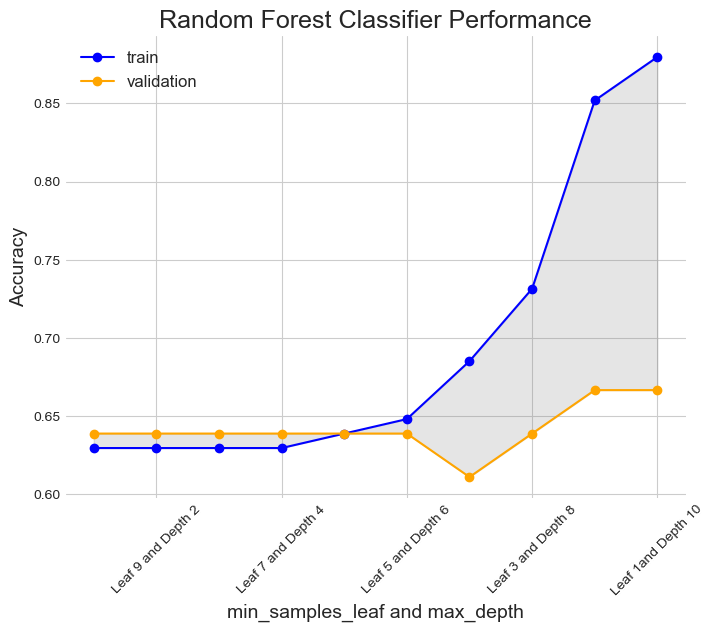

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
0,1,10,0.879630,0.666667,0.212963
1,2,9,0.851852,0.666667,0.185185
2,3,8,0.731481,0.638889,0.092593
3,4,7,0.685185,0.611111,0.074074
4,5,6,0.648148,0.638889,0.009259
5,6,5,0.638889,0.638889,0.000000
6,7,4,0.629630,0.638889,-0.009259
7,8,3,0.629630,0.638889,-0.009259
8,9,2,0.629630,0.638889,-0.009259
9,10,1,0.629630,0.638889,-0.009259


In [95]:
# run random forest
random_forest_scores(X_bow, y_train, X_validate_bow, y_validate)

## KNN

In [96]:
def k_nearest2(X_bow, y_train, X_validate_bow, y_validate):
    """
    Trains and evaluates KNN models for different values of k and plots the results.

    Parameters:
    -----------
    X_train: array-like, shape (n_samples, n_features)
        Training input samples.
    y_train: array-like, shape (n_samples,)
        Target values for the training input samples.
    X_validate: array-like, shape (n_samples, n_features)
        Validation input samples.
    y_validate: array-like, shape (n_samples,)
        Target values for the validation input samples.

    Returns:
    --------
    results: pandas DataFrame
        Contains the train and validation accuracy for each value of k.
    """
    metrics = []
    train_score = []
    validate_score = []
    for k in range(1,21):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_bow, y_train)
        train_score.append(knn.score(X_bow, y_train))
        validate_score.append(knn.score(X_validate_bow, y_validate))
        diff_score = train_score[-1] - validate_score[-1]
        metrics.append({'k': k, 'train_score': train_score[-1], 'validate_score': validate_score[-1], 'diff_score': diff_score})

    baseline_accuracy = (y_train == 6).mean()

    results = pd.DataFrame.from_records(metrics)

    # modify the last few lines of the function
    # drop the diff_score column before plotting
    results_for_plotting = results.drop(columns=['diff_score'])
    with sns.axes_style('whitegrid'):
        ax = results_for_plotting.set_index('k').plot(figsize=(16,9))
    plt.ylabel('Accuracy')
    plt.axhline(baseline_accuracy, linewidth=2, color='black', label='baseline')
    plt.xticks(np.arange(0,21,1))   
    min_diff_idx = np.abs(results['diff_score']).argmin()
    min_diff_k = results.loc[min_diff_idx, 'k']
    min_diff_score = results.loc[min_diff_idx, 'diff_score']
    ax.axvline(min_diff_k, linestyle='--', linewidth=2, color='red', label=f'min diff at k={min_diff_k} (diff={min_diff_score:.3f})')
    plt.fill_between(results['k'], train_score, validate_score, alpha=0.2, color='gray', where=(results['k'] > 0))    
    plt.title('K Nearest Neighbor', fontsize=18)
    plt.legend()
    plt.show()
    
    return results

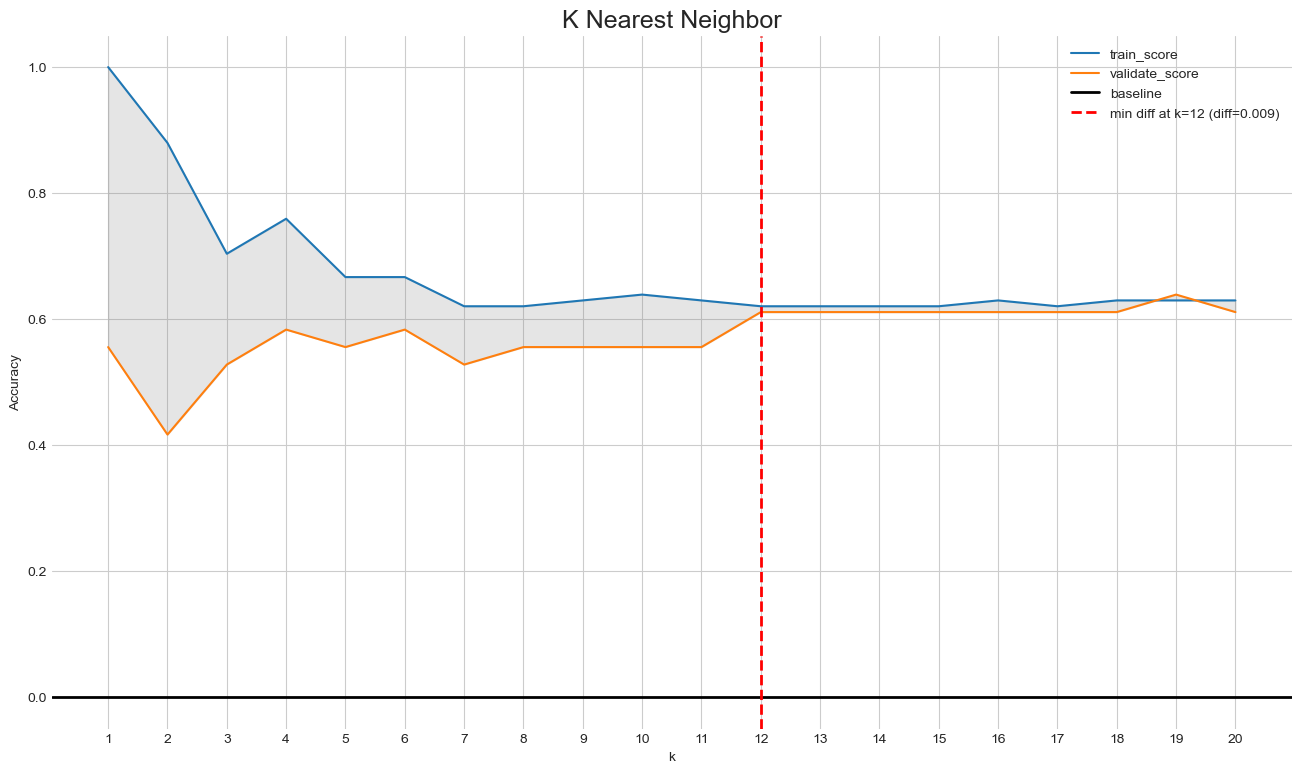

,k,train_score,validate_score,diff_score
0,1,1.000000,0.555556,0.444444
1,2,0.879630,0.416667,0.462963
2,3,0.703704,0.527778,0.175926
3,4,0.759259,0.583333,0.175926
4,5,0.666667,0.555556,0.111111
5,6,0.666667,0.583333,0.083333
6,7,0.620370,0.527778,0.092593
7,8,0.620370,0.555556,0.064815
8,9,0.629630,0.555556,0.074074
9,10,0.638889,0.555556,0.083333


In [97]:
# run knn
k_nearest2(X_bow, y_train, X_validate_bow, y_validate)

## Logistic Regression

In [98]:
def plot_logistic_regression(X_bow, X_validate_bow, y_train, y_validate):
    '''
    Trains multiple logistic regression models with different regularization strengths (C) on the given training
    data, and plots the resulting train and validation scores against C values. The optimal value of C is marked
    by a vertical red dashed line, and the associated difference between the train and validation scores is shown
    in the plot legend.

    Parameters:
    X_train : array-like of shape (n_samples, n_features)
        The training input samples.
    X_validate : array-like of shape (n_samples, n_features)
        The validation input samples.
    y_train : array-like of shape (n_samples,)
        The target values for training.
    y_validate : array-like of shape (n_samples,)
        The target values for validation.

    Returns:
    df1 : pandas DataFrame
        A table containing the C, train_score, validate_score, and diff_score values for each model.
    '''
    train_scores = []
    val_scores = []
    c_values = [.01, .1, 1, 10 , 100, 1000]
    for c in c_values:
        logit = LogisticRegression(C=c, random_state=123)
        logit.fit(X_bow, y_train)
        train_score = logit.score(X_bow, y_train)
        val_score = logit.score(X_validate_bow, y_validate)
        train_scores.append(train_score)
        val_scores.append(val_score)
    
    # Calculate the difference between the train and validation scores
    diff_scores = [train_score - val_score for train_score, val_score in zip(train_scores, val_scores)]
     
    # Put results into a list of tuples
    results = list(zip(c_values, train_scores, val_scores, diff_scores))
    # Convert the list of tuples to a Pandas DataFrame
    df1 = pd.DataFrame(results, columns=['C', 'train_score', 'validate_score', 'diff_score'])
    

    # Plot the results
    plt.plot(c_values, train_scores, label='Train score')
    plt.plot(c_values, val_scores, label='Validation score')
    min_diff_idx = np.abs(diff_scores).argmin()
    min_diff_c = results[min_diff_idx][0]
    min_diff_score = results[min_diff_idx][3]
    plt.axvline(min_diff_c, linestyle='--', linewidth=2, color='red', label=f'min diff at C={min_diff_c} (diff={min_diff_score:.3f})')
    plt.fill_between(c_values, train_scores, val_scores, alpha=0.2, color='gray')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title('Logistic Regression Accuracy vs C')
    plt.legend()
    plt.show()

    return df1

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

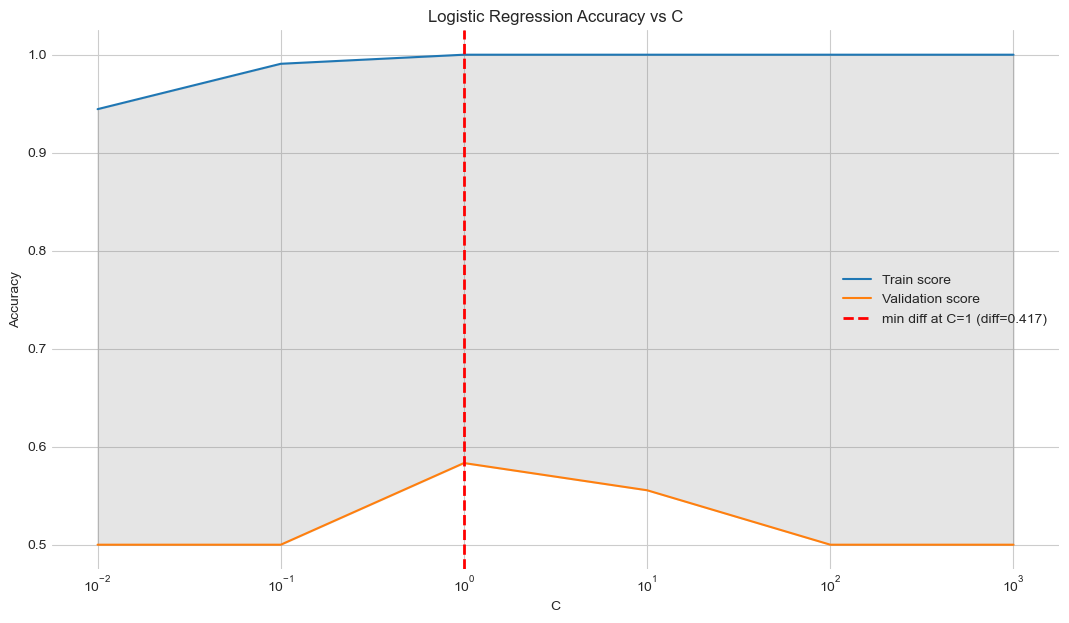

,C,train_score,validate_score,diff_score
0,0.01,0.944444,0.500000,0.444444
1,0.10,0.990741,0.500000,0.490741
2,1.00,1.000000,0.583333,0.416667
3,10.00,1.000000,0.555556,0.444444
4,100.00,1.000000,0.500000,0.500000
5,1000.00,1.000000,0.500000,0.500000


In [99]:
# run logistic regression model
plot_logistic_regression(X_bow, X_validate_bow, y_train, y_validate)